In [1]:
import sys
import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
label_size = 24
matplotlib.rc('font', size=label_size) 

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle

from astropy.io import ascii, fits
from astropy.table import Table


import warnings
warnings.filterwarnings("once")

In [272]:
# in_spec_f = ['apStar-dr17-2M00000002+7417074.fits','asStar-dr17-2M00000035-7323394.fits',
#              'asStar-dr17-2M03592391+1506513.fits','asStar-dr17-2M04024943+1626023.fits',
#              'asStar-dr17-2M03585730+2123454.fits','apStar-dr17-2M19331341-1923240.fits',
#              'apStar-dr17-2M00001719+6221324.fits','apStar-dr17-2M00001653+5540107.fits']
hdu = fits.open('/Users/xwou/Documents/Research/MIT/spectro_photo_parallax_DR17/spec_download_norm/data/training_labels_parent_apogeedr17_edr3_test.fits')
labels = Table(hdu[1].data)
hdu.close()
in_spec_f = labels['FILE']
ii_star = 95
print(in_spec_f[ii_star])

apStar-dr17-2M00020080+5817510.fits


In [240]:
labels

apogee_id,parallax,parallax_error,parallax_over_error,bp_rp,phot_g_mean_flux,phot_bp_mean_flux,phot_rp_mean_flux,phot_g_mean_flux_error,phot_bp_mean_flux_error,phot_rp_mean_flux_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,visibility_periods_used,astrometric_gof_al,astrometric_chi2_al,astrometric_n_good_obs_al,source_id,original_ext_source_id,angular_distance,xm_flag,allwise_oid,number_of_neighbours,number_of_mates,designation,w1mpro,w2mpro,w1mpro_error,w2mpro_error,APOGEE_ID,LOGG,J,H,K,J_ERR,H_ERR,K_ERR,EXTRATARG,GAIAEDR3_SOURCE_ID,TELESCOPE,FIELD,FILE
str22,float64,float32,float32,float32,float64,float64,float64,float32,float32,float32,float32,float32,float32,int16,float32,float32,int16,int64,str255,float32,int16,int32,int16,int16,str19,float64,float64,float64,float64,str30,float32,float32,float32,float32,float32,float32,float32,int32,int64,str6,str20,str36
b'2M00000002+7417074',0.2854416643384685,0.01947503,14.656802,2.7766848,393926.9303916319,67068.36002689962,502264.7149217262,284.58813,247.08754,746.22296,11.698828,13.272248,10.4955635,25,0.4538917,1600.5779,348,538028216707715712,J000000.04+741707.5,0.0262377,8,733278841,1,0,J000000.04+741707.5,7.257,7.353,0.025,0.02,2M00000002+7417074,0.9045983,8.597,7.667,7.314,0.039,0.029,0.018,0,538028216707715712,apo25m,120+12,apStar-dr17-2M00000002+7417074.fits
b'2M00000317+5821383',0.35985185993571767,0.019697534,18.268879,2.4337177,657139.7779891618,141511.31328708443,772715.6268454853,253.65714,195.45905,493.22546,11.143223,12.461564,10.027846,26,0.80899864,1831.617,403,422737314373993984,J000003.17+582138.3,0.032791663,8,689699320,1,0,J000003.17+582138.3,6.804,6.951,0.059,0.019,2M00000317+5821383,0.9987238,8.206,7.279,6.946,0.021,0.027,0.021,0,422737314373993984,apo25m,116-04,apStar-dr17-2M00000317+5821383.fits
b'2M00000546+6152107',0.36539398019592473,0.015403932,23.720825,2.2295256,407996.6344642014,100507.57903902336,454726.8453716747,81.95807,85.40096,218.34204,11.660726,12.833045,10.603519,25,-3.5061915,889.5191,411,429530195985183744,J000005.49+615210.7,0.10692527,8,701716063,1,0,J000005.49+615210.7,7.523,7.682,0.043,0.033,2M00000546+6152107,1.2815037,9.013,8.029,7.745,0.063,0.057,0.02,0,429530195985183744,apo25m,116+00,apStar-dr17-2M00000546+6152107.fits
b'2M00000717-7213573',-0.02482243151404417,0.05112986,-0.4854782,1.4345684,3027.705116968479,1190.1605642647546,2589.2509179560357,1.9596428,11.778788,10.418661,16.984583,17.649529,16.21496,25,0.31948283,400.38895,380,4701763512829847808,J000007.17-721357.2,0.04410313,8,20002330,1,0,J000007.17-721357.2,14.342,14.443,0.026,0.04,2M00000717-7213573,2.1463056,15.187,14.516,14.492,0.049,0.064,0.096,1,4701763512829847808,lco25m,SMC12,asStar-dr17-2M00000717-7213573.fits
b'2M00000797+6436119',0.18480602737244411,0.05470353,3.37832,3.112812,3129.6627869870986,417.1917176712446,4257.96283234669,2.0576413,8.886681,8.657259,16.948624,18.787703,15.6748905,26,-0.33214045,436.3897,413,431771039351005184,J000007.99+643612.0,0.047733244,8,710201285,1,0,J000007.99+643612.0,11.253,11.25,0.021,0.02,2M00000797+6436119,2.1282876,13.239,12.109,11.703,0.024,0.029,0.019,0,431771039351005184,apo25m,117+01,apStar-dr17-2M00000797+6436119.fits
b'2M00001493+5534446',0.2509185437711845,0.014997744,16.73042,2.036028,130473.06622114642,36436.07938598823,137938.03159441674,36.02776,46.424988,96.67613,12.898564,13.934713,11.898685,26,4.5510807,1156.0371,543,420513826985325696,J000014.93+553444.6,0.048711292,8,679145295,1,0,J000014.93+553444.6,9.168,9.314,0.022,0.02,2M00001493+5534446,1.1980178,10.372,9.503,9.269,0.021,0.03,0.023,0,420513826985325696,apo25m,NGC7789_btx,apStar-dr17-2M00001493+5534446.fits
b'2M00001649-7342309',0.020264521471817835,0.054416753,0.3723949,1.397707,2581.488740087531,1031.8423825892335,2169.889643229576,1.647394,8.256891,9.000071,17.157692,17.804508,16.406801,25,0.56289834,404.9394,378,4689378643918560128,J000016.49-734230.9,0.11712436,8,16683775,1,0,J000016.49-734230.9,14.58,14.648,0.029,0.05,2M00001649-7342309,1.2

In [273]:
hdus = fits.open("/Users/xwou/Documents/Research/MIT/spectro_photo_parallax_DR17/spec_download_norm/data/spectra/" + in_spec_f[ii_star])
header = hdus[0].header
data = hdus[1].data
noise = hdus[2].data
bitmask = hdus[3].data
hdus.close()
print(np.shape(data))

(5, 8575)


In [274]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
CRVAL1  =                4.179 / Start log10(wavelength) in subsequent HDUs     
CDELT1  =                6E-06 / Dispersion in log10(wave) in subsequent HDUs   
CRPIX1  =                    1 / Pixel of starting wavelength in subsequent HDUs
CTYPE1  = 'LOG-LINEAR'         / Logarithmic wavelength scale in subsequent HDUs
DC-FLAG =                    1 / Logarithmic wavelength scale in subsequent HDUs
NWAVE   =                 8575 / Number of wavelengths in subsequent HDUs       
FIELD   = '116-04  '           / APOGEE field name                              
OBJID   = '2M00020080+5817510' / APOGEE object name                             
SNR     =    145.01812070601

In [292]:
# hdus = fits.open("/Users/xwou/Documents/Research/MIT/spectro_photo_parallax_DR17/spec_download_norm/test_norm_data.fits")
hdus = fits.open("/Users/xwou/Documents/Research/MIT/spectro_photo_parallax_DR17/spec_download_norm/data/all_flux_norm_parent_apogeedr17_edr3_test.fits")
norm_data = hdus[0].data
fluxes = hdus[0].data[:, :, 0]
sigmas = hdus[0].data[:, :, 1]
hdus.close()
print(np.shape(norm_data))

(8575, 100, 3)


In [293]:
# Inspect which normalizations failed
for i in range(np.shape(norm_data)[1]):
#     if np.isnan(norm_data[:,i,0]).sum() > 1000:
    print(i,np.isnan(norm_data[:,i,0]).sum(),in_spec_f[i])

0 0 apStar-dr17-2M00000002+7417074.fits
1 0 apStar-dr17-2M00000317+5821383.fits
2 0 apStar-dr17-2M00000546+6152107.fits
3 0 asStar-dr17-2M00000717-7213573.fits
4 0 apStar-dr17-2M00000797+6436119.fits
5 0 apStar-dr17-2M00001493+5534446.fits
6 0 asStar-dr17-2M00001649-7342309.fits
7 0 apStar-dr17-2M00001719+6221324.fits
8 0 apStar-dr17-2M00002005+5703467.fits
9 0 apStar-dr17-2M00002036+6153416.fits
10 0 apStar-dr17-2M00002118+6136420.fits
11 0 apStar-dr17-2M00002227+6223341.fits
12 0 apStar-dr17-2M00002422+5642193.fits
13 0 apStar-dr17-2M00002472+5518473.fits
14 0 apStar-dr17-2M00002504+1517108.fits
15 0 asStar-dr17-2M00002728-7318506.fits
16 0 apStar-dr17-2M00002903+6403157.fits
17 0 apStar-dr17-2M00002908+6140446.fits
18 0 apStar-dr17-2M00003061+5820590.fits
19 0 apStar-dr17-2M00003118+7056365.fits
20 0 apStar-dr17-2M00003151+1556005.fits
21 0 apStar-dr17-2M00003157+7059085.fits
22 0 apStar-dr17-2M00003303+7458357.fits
23 0 apStar-dr17-2M00003414+7539100.fits
24 0 apStar-dr17-2M0000345

In [294]:
start_wl = header['CRVAL1']
diff_wl = header['CDELT1']
val = diff_wl * len(data[0]) + start_wl
wl_full_log = np.arange(start_wl, val, diff_wl)
wl_full = np.array([10**aval for aval in wl_full_log])

In [284]:
check_range = range(*np.searchsorted(wl_full, [15200,15700]))
for i in range(len(data)):
    print(i)
    masks = np.array(bitmask[i][check_range])
    unique, counts = np.unique(masks, return_counts=True)
    print(np.asarray((unique, counts)).T)


0
[[ 512 2273]
 [4608   70]]
1
[[   0 2343]]
2
[[  512  2226]
 [ 4608    91]
 [16929    19]
 [21025     7]]
3
[[  512  2230]
 [ 4608    82]
 [16929    25]
 [21025     3]
 [21029     3]]
4
[[  512  2238]
 [ 4608    92]
 [16929     9]
 [16945     4]]


In [285]:
badbit = 0
for i in range(16):
    if i == 10 or i == 11 or i == 9:
        continue
    badbit += 2**i

print(badbit)
gd_pix = (np.bitwise_and(bitmask[0], badbit) == 0)
print(gd_pix.sum())

61951
7997


In [301]:
# Examine typical spec error
print(np.nanmean(noise[0,gd_pix]), np.nanmedian(noise[0,gd_pix]), np.nanstd(noise[0,gd_pix]))
print(np.nanmean(data[0,gd_pix]), np.nanmedian(data[0,gd_pix]), np.nanstd(data[0,gd_pix]))
print(np.nanmean(norm_data[gd_pix,ii_star,1]), np.nanmedian(norm_data[gd_pix,ii_star,1]), np.nanstd(norm_data[gd_pix,ii_star,1]))
print(np.nanmean(norm_data[gd_pix,ii_star,0]), np.nanmedian(norm_data[gd_pix,ii_star,0]), np.nanstd(norm_data[gd_pix,ii_star,0]))
print(np.nanmedian(noise[0,gd_pix])/np.nanmedian(data[0,gd_pix]), np.nanmedian(norm_data[gd_pix,ii_star,1])/np.nanmedian(norm_data[gd_pix,ii_star,0]))

5356.242100796912 5.680632751468916 133979.12693396574
844.2993414390171 839.1850903564603 89.40610829095596
5.457667936496499 0.006793796081489368 141.5247796225783
0.9680514007569276 0.9906099083964647 0.06580906312303034
0.006769225069353837 0.006858195162298271


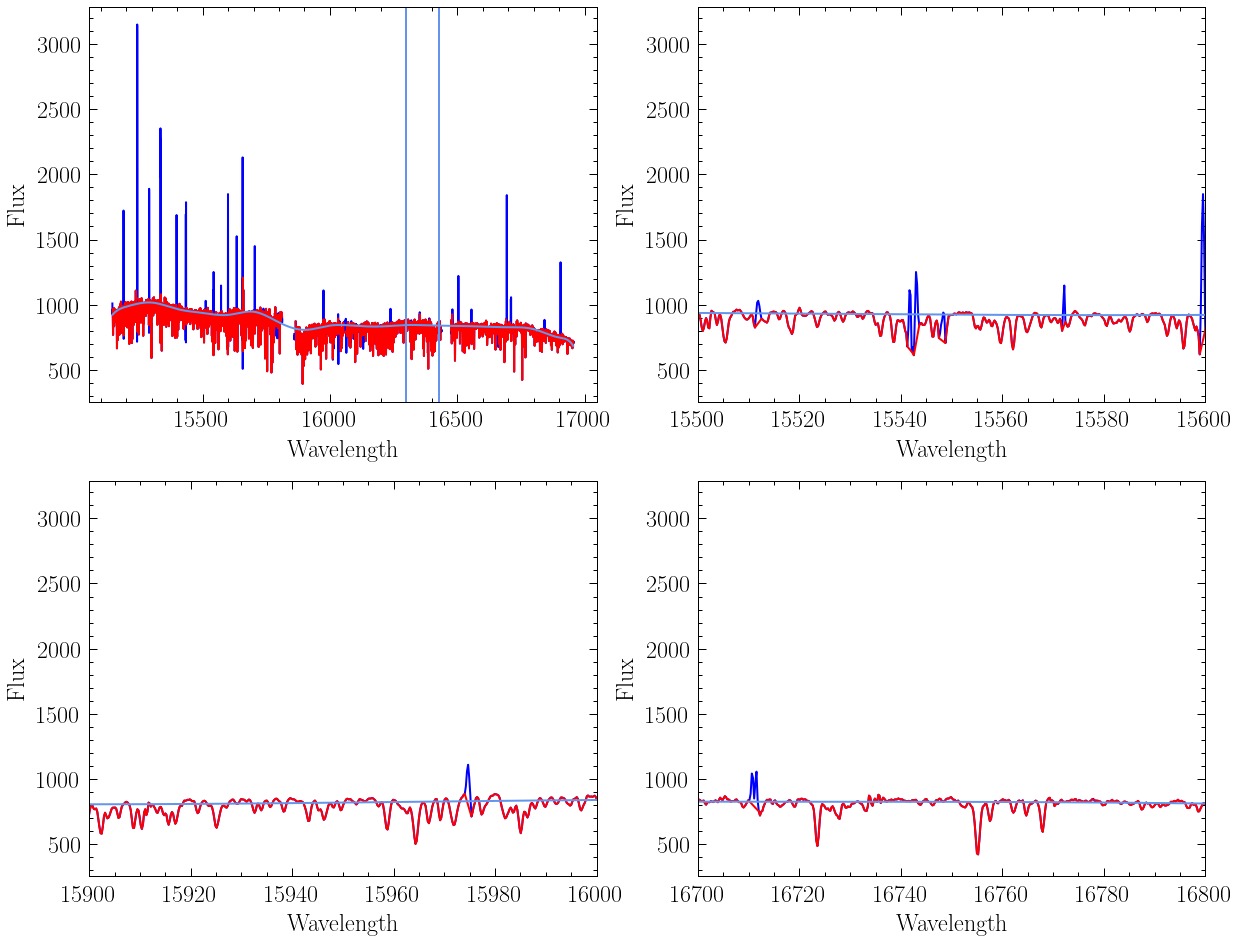

In [295]:
# Plot spectra
f, axs = plt.subplots(2,2,figsize=[20,16])

axs[0,0].plot(wl_full, data[0,:],'b')
# axs[0,0].plot(wl_full[bitmask[0]==0], data[0,bitmask[0]==0],'r')
axs[0,0].plot(wl_full[gd_pix], data[0,gd_pix],'r')
axs[0,0].plot(wl_full, norm_data[:,ii_star,2])
# axs[0,0].set_xlim([15500,15600])
# axs[0,0].set_ylim([0,12000])
axs[0,0].axvline(16300)
axs[0,0].axvline(16430)
axs[0,0].set_xlabel('Wavelength')
axs[0,0].set_ylabel('Flux')


axs[0,1].plot(wl_full, data[0,:],'b')
# axs[0,1].plot(wl_full[bitmask[0]==0], data[0,bitmask[0]==0],'r')
axs[0,1].plot(wl_full[gd_pix], data[0,gd_pix],'r')
axs[0,1].plot(wl_full, norm_data[:,ii_star,2])
axs[0,1].set_xlim([15500,15600])
axs[0,1].set_xlabel('Wavelength')
axs[0,1].set_ylabel('Flux')

axs[1,0].plot(wl_full, data[0,:],'b')
# axs[1,0].plot(wl_full[bitmask[0]==0], data[0,bitmask[0]==0],'r')
axs[1,0].plot(wl_full[gd_pix], data[0,gd_pix],'r')
axs[1,0].plot(wl_full, norm_data[:,ii_star,2])
axs[1,0].set_xlim([15900,16000])
axs[1,0].set_xlabel('Wavelength')
axs[1,0].set_ylabel('Flux')

axs[1,1].plot(wl_full, data[0,:],'b')
# axs[1,1].plot(wl_full[bitmask[0]==0], data[0,bitmask[0]==0],'r')
axs[1,1].plot(wl_full[gd_pix], data[0,gd_pix],'r')
axs[1,1].plot(wl_full, norm_data[:,ii_star,2])
axs[1,1].set_xlim([16700,16800])
axs[1,1].set_xlabel('Wavelength')
axs[1,1].set_ylabel('Flux')


plt.show()
# f.savefig('example_'+in_spec_f[ii_star][:-5]+'.png')

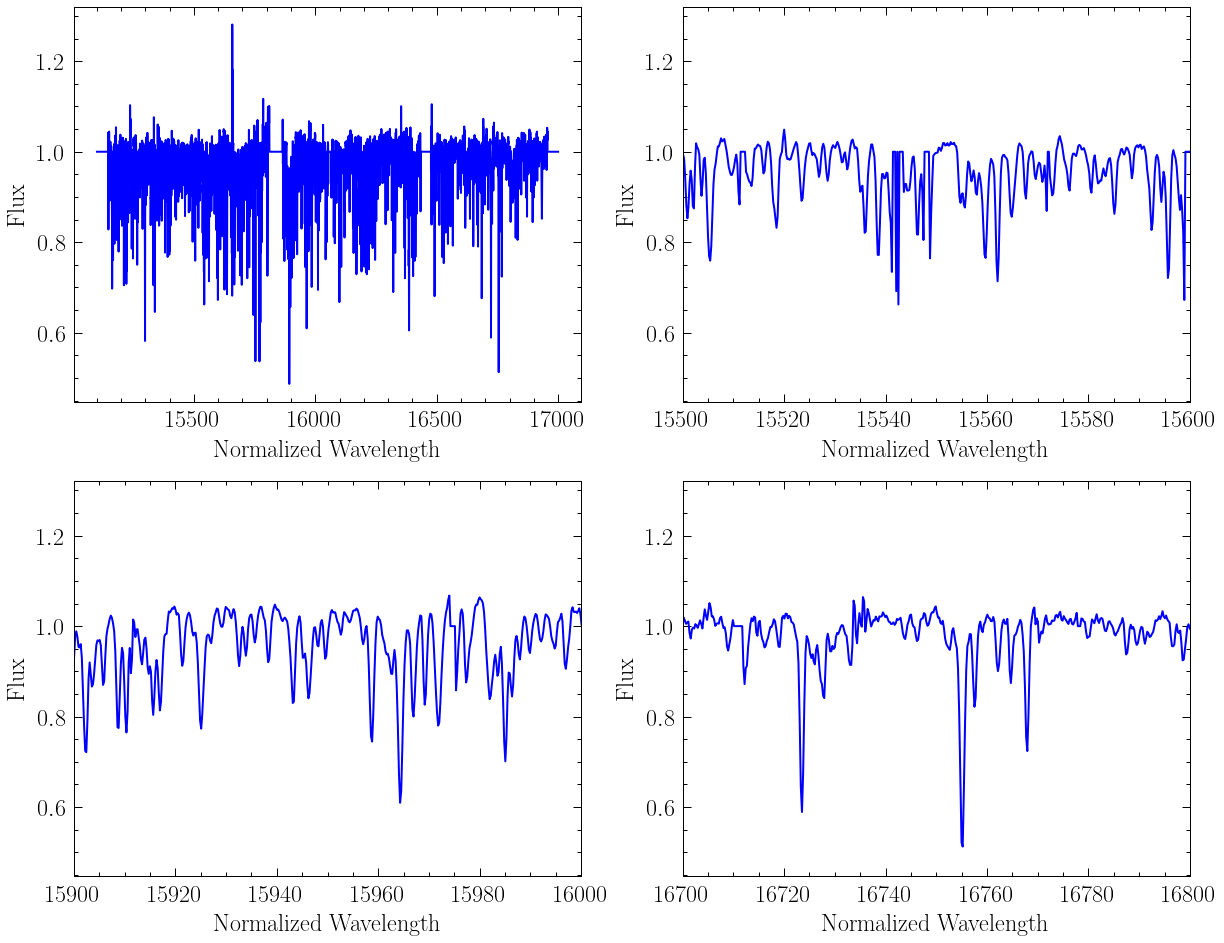

In [296]:
# Plot normalized spectra
f, axs = plt.subplots(2,2,figsize=[20,16])

axs[0,0].plot(wl_full, norm_data[:,ii_star,0],'b')
# axs[0,0].set_xlim([15500,15600])
axs[0,0].set_xlabel('Normalized Wavelength')
axs[0,0].set_ylabel('Flux')

axs[0,1].plot(wl_full, norm_data[:,ii_star,0],'b')
axs[0,1].set_xlim([15500,15600])
axs[0,1].set_xlabel('Normalized Wavelength')
axs[0,1].set_ylabel('Flux')

axs[1,0].plot(wl_full, norm_data[:,ii_star,0],'b')
axs[1,0].set_xlim([15900,16000])
axs[1,0].set_xlabel('Normalized Wavelength')
axs[1,0].set_ylabel('Flux')

axs[1,1].plot(wl_full, norm_data[:,ii_star,0],'b')
axs[1,1].set_xlim([16700,16800])
axs[1,1].set_xlabel('Normalized Wavelength')
axs[1,1].set_ylabel('Flux')

plt.show()
# f.savefig('example_normed_'+in_spec_f[ii_star][:-5]+'.png')

In [302]:
gap_ii = np.where(np.isnan(norm_data[:,ii_star,0]))[0]
print(gap_ii,wl_full[gap_ii],bitmask[0][gap_ii],len(gap_ii))

[] [] [] 0


In [36]:
norm_data[:,0,0]

array([15100.80154164,            nan,            nan,            nan])